<a href="https://colab.research.google.com/github/krishConqueror0609/Tinkers/blob/m2/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('alzehaimers.csv')


In [ ]:
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [ ]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

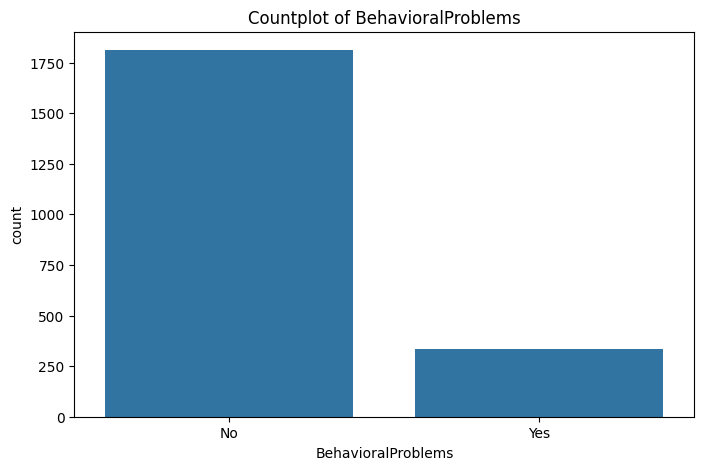

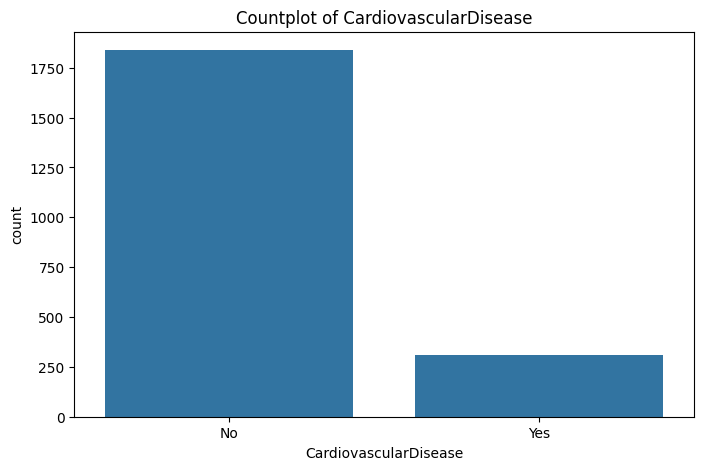

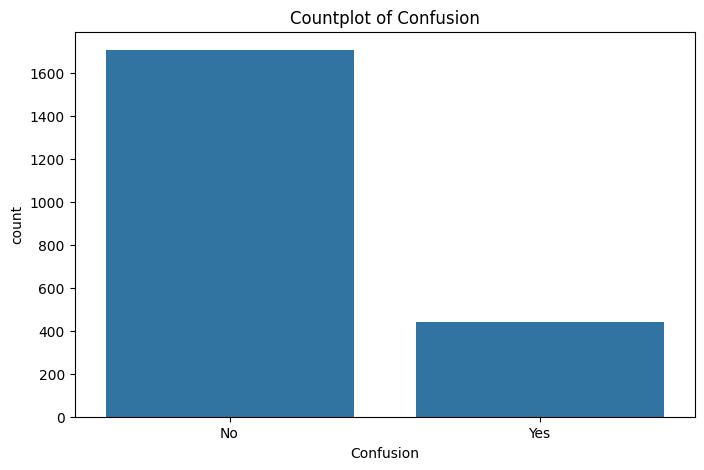

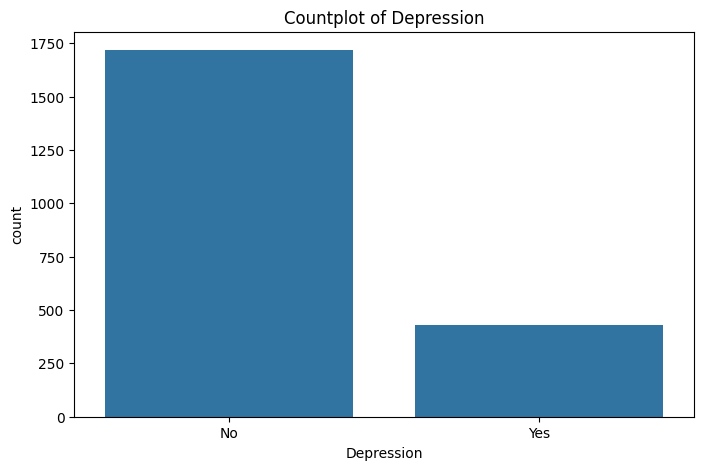

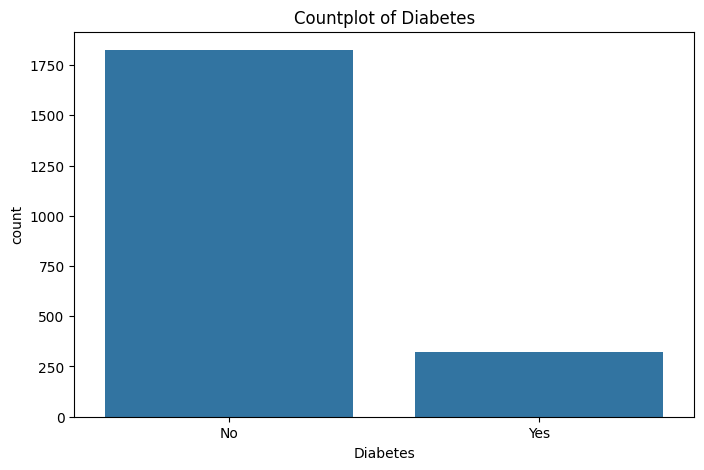

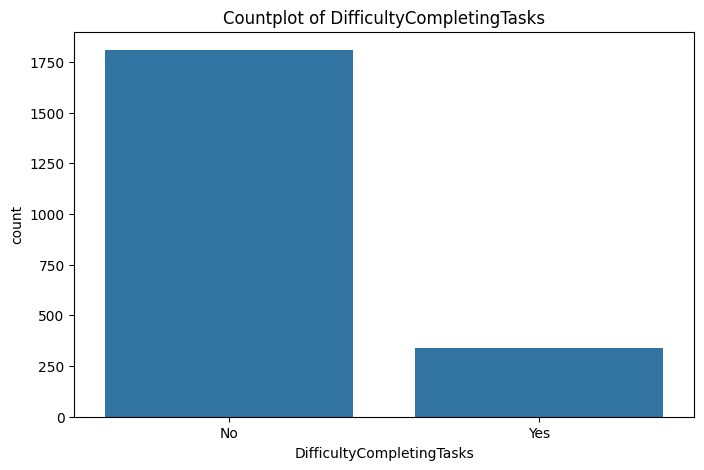

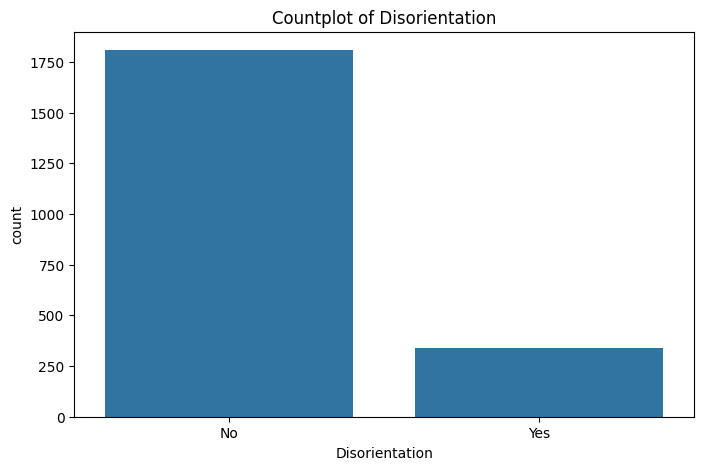

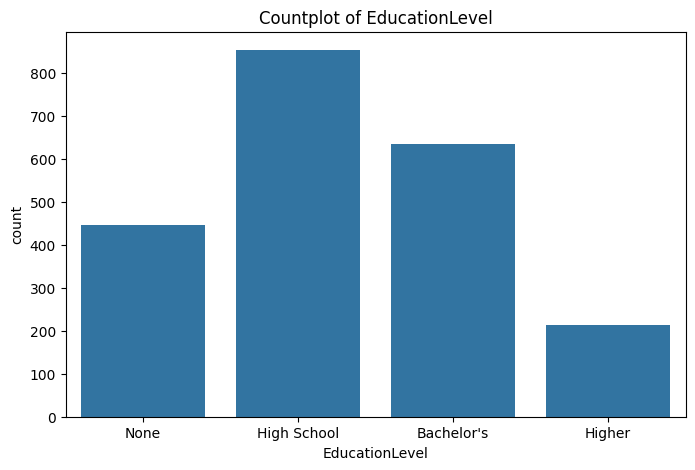

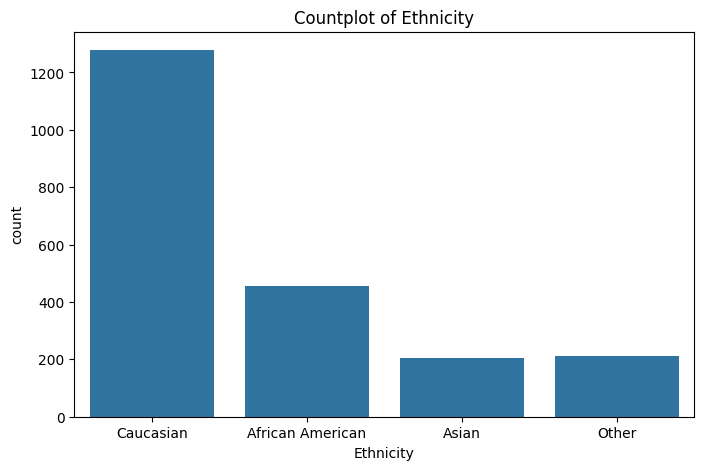

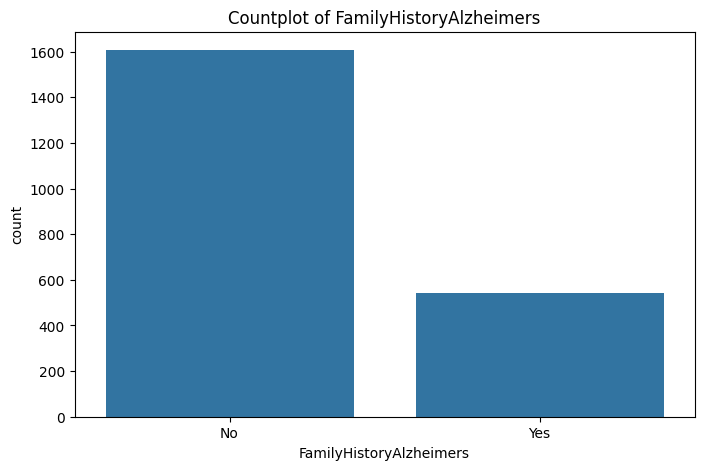

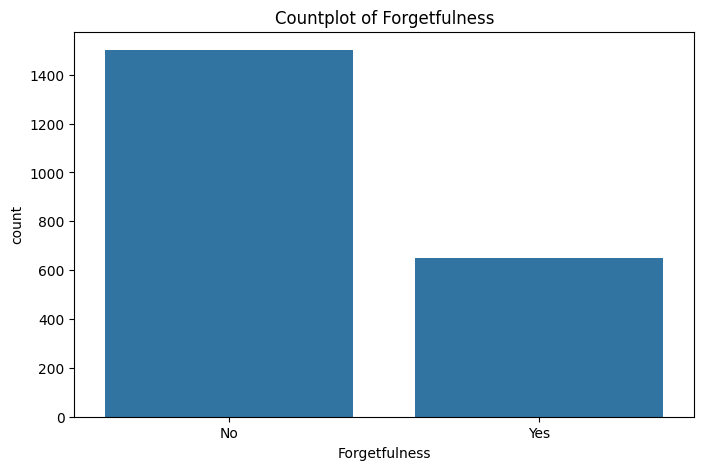

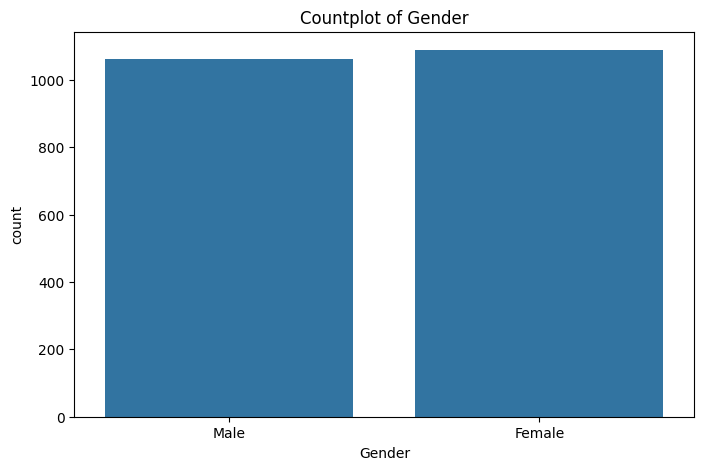

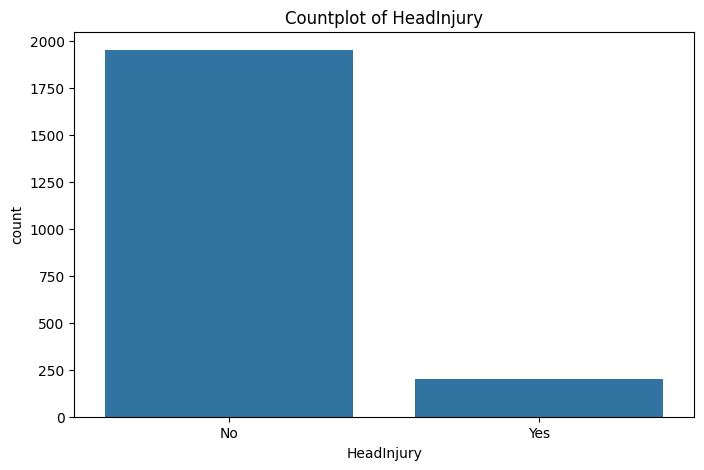

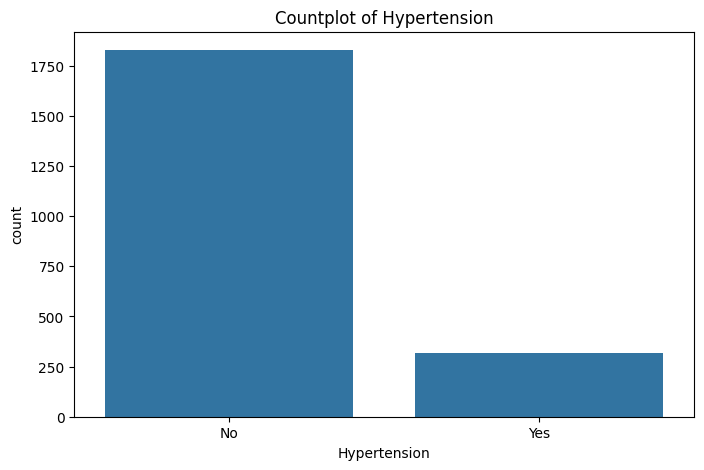

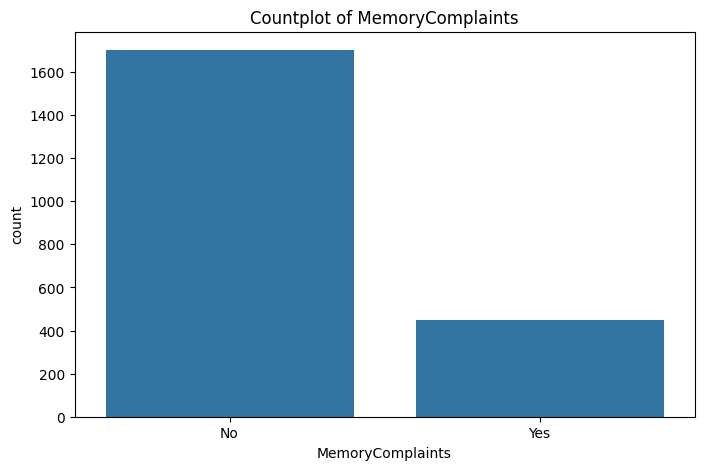

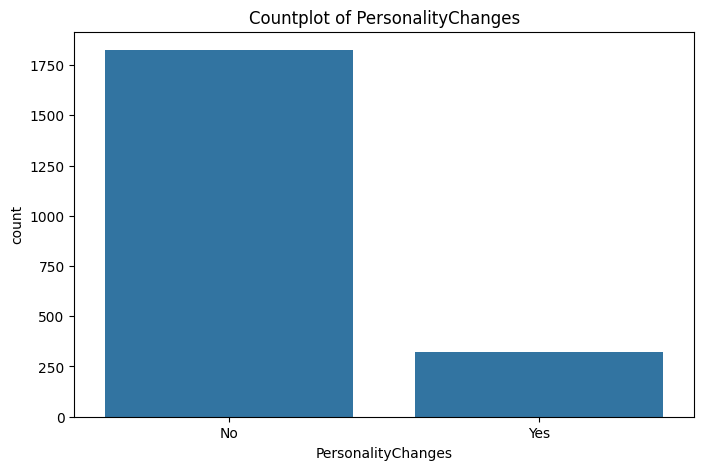

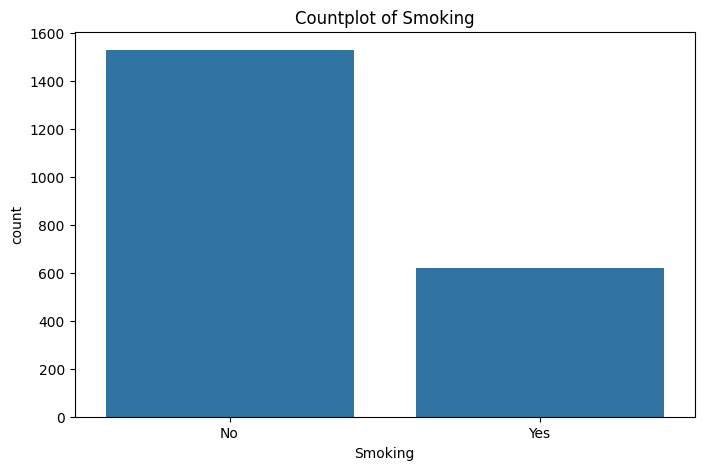

In [ ]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
  plt.figure(figsize=(8, 5))
  sns.countplot(data=df, x=column)
  plt.title(f'Countplot of {column}')

    # Directly set custom labels
  labels = custom_labels[column]
  ticks = range(len(labels))
  plt.xticks(ticks=ticks, labels=labels)

  plt.show()

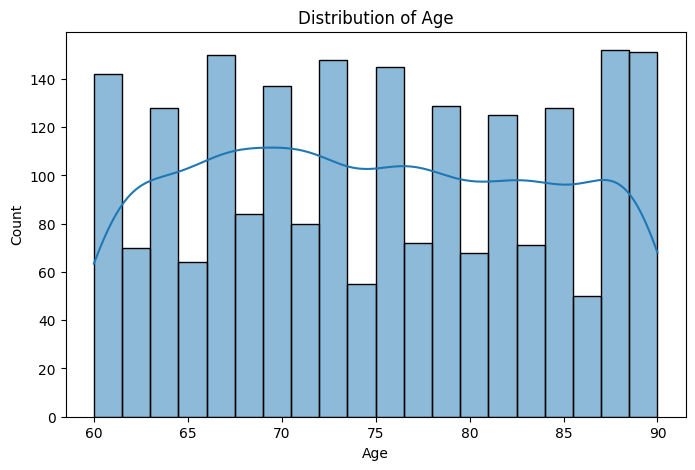

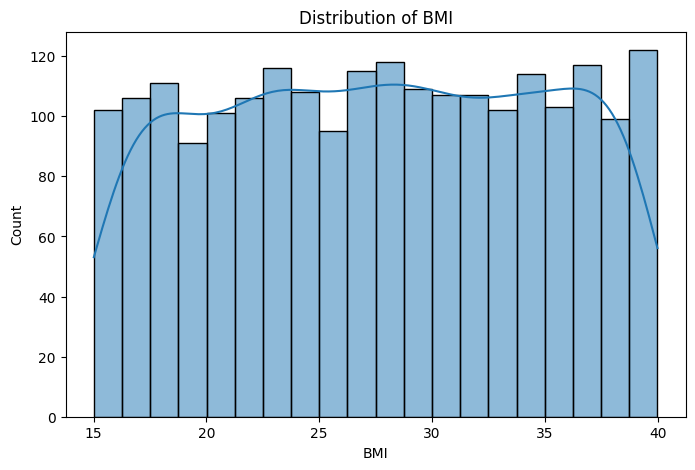

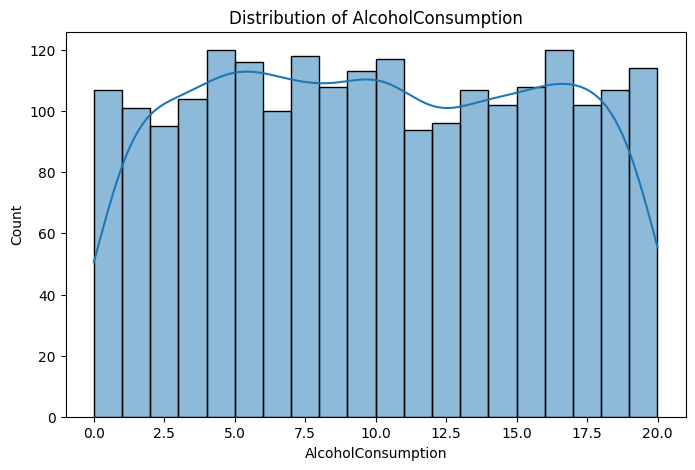

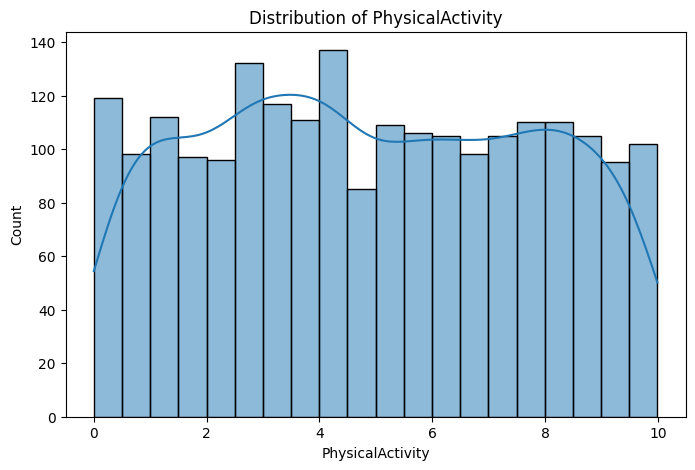

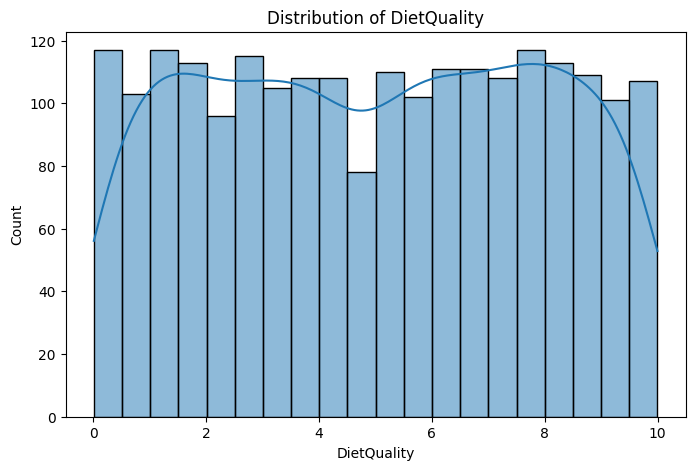

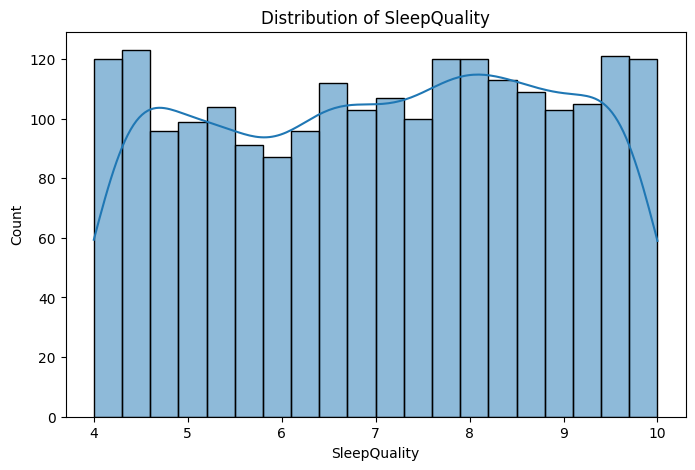

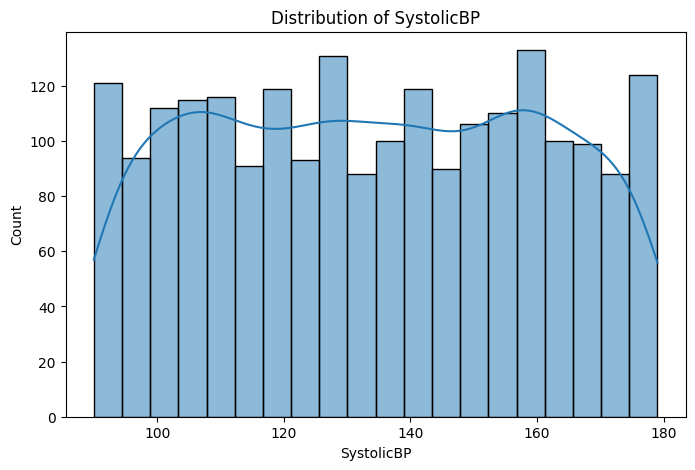

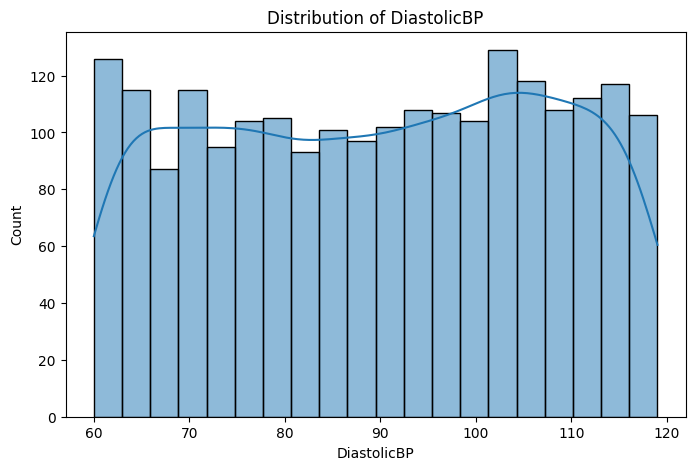

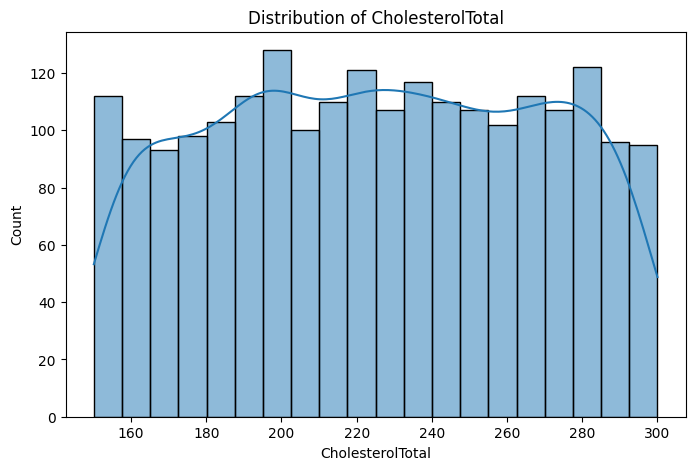

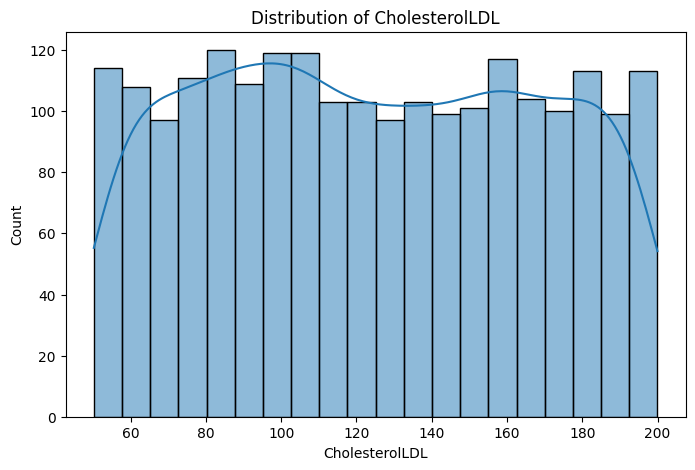

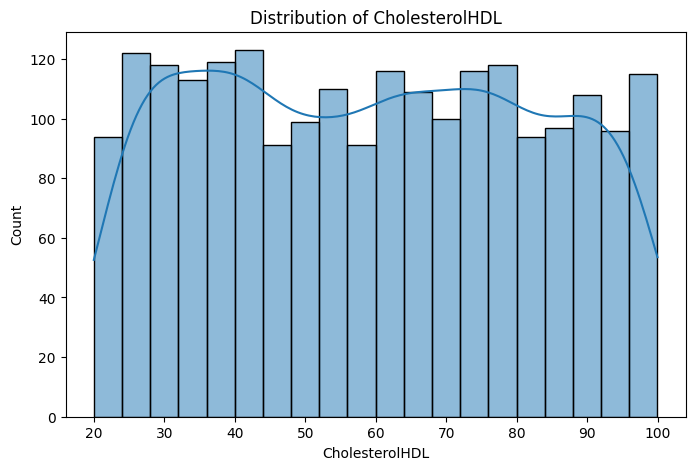

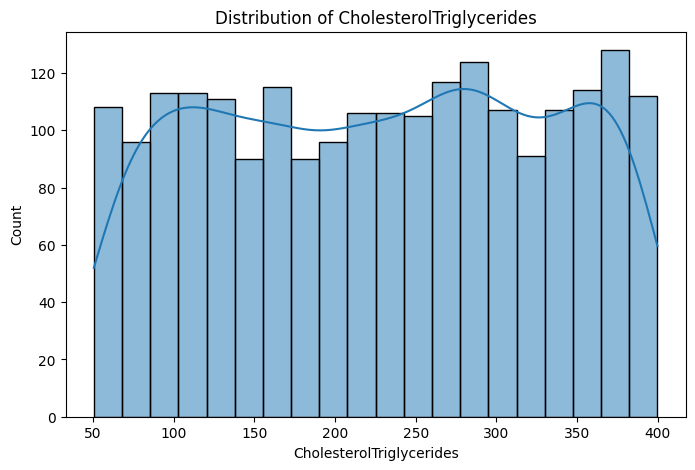

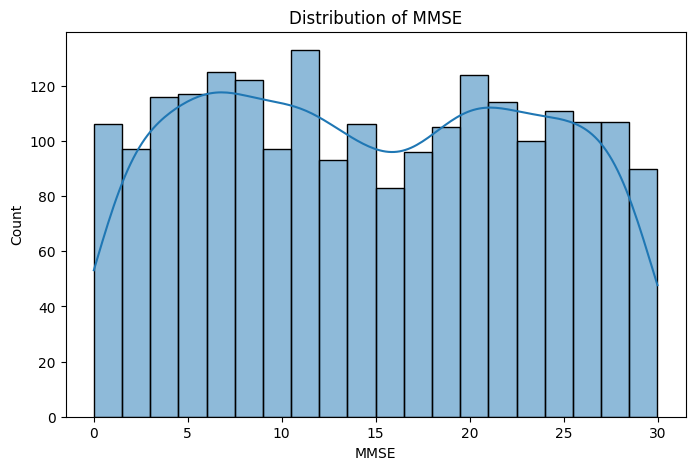

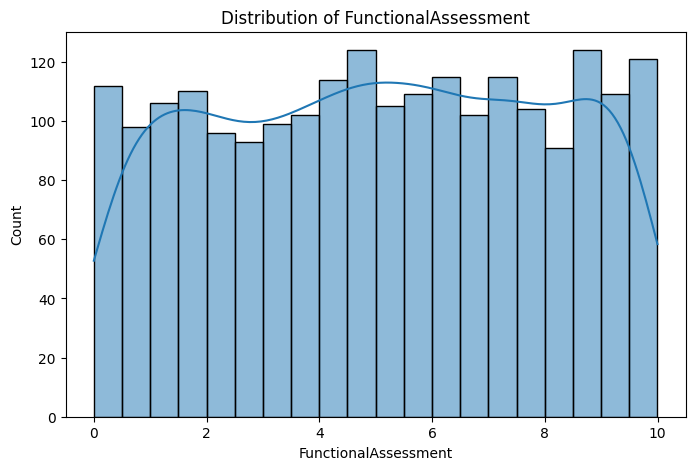

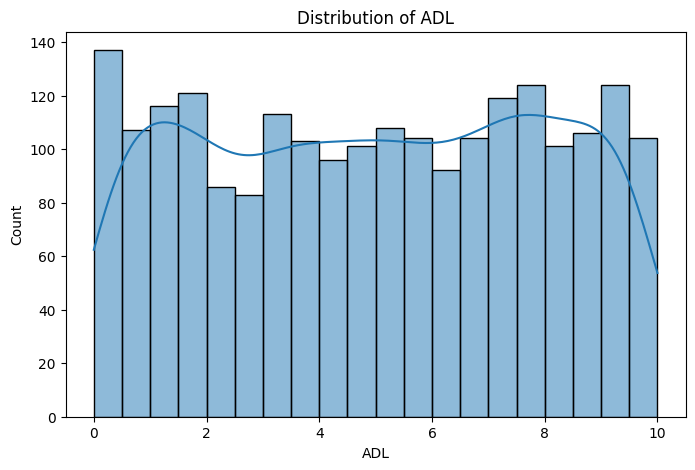

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

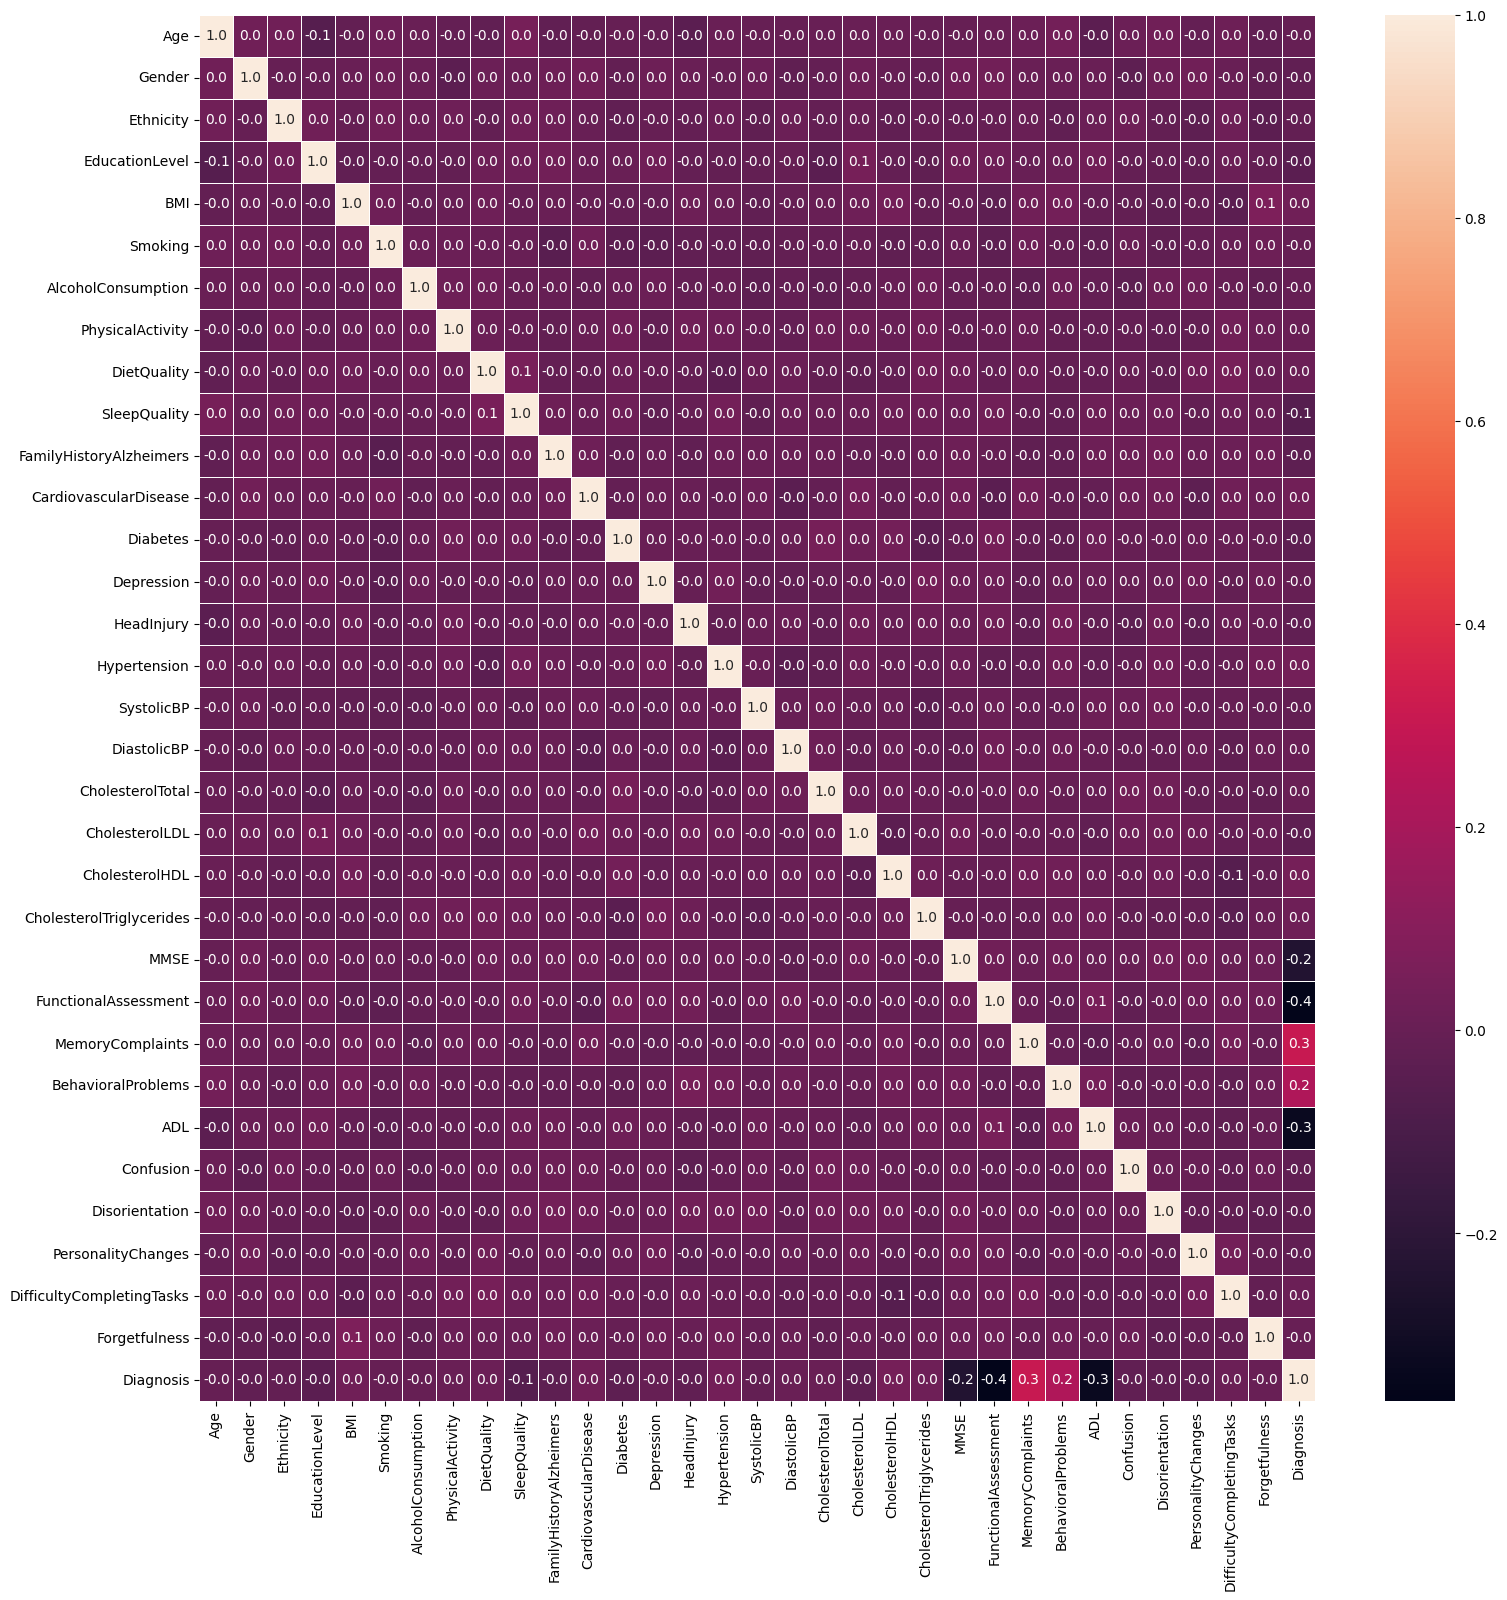

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

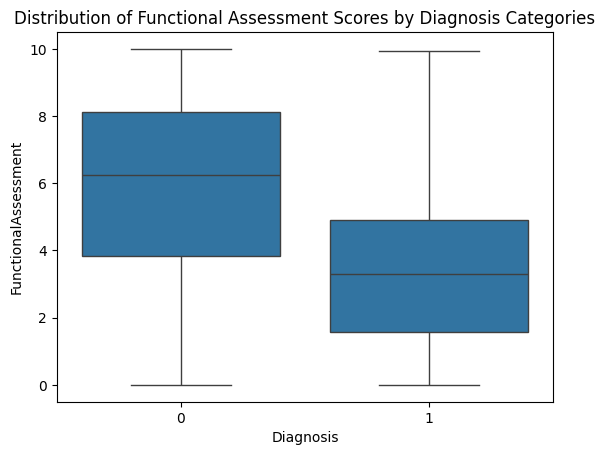

In [ ]:
sns.boxplot(data=df, y='FunctionalAssessment', x='Diagnosis')
plt.title('Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()


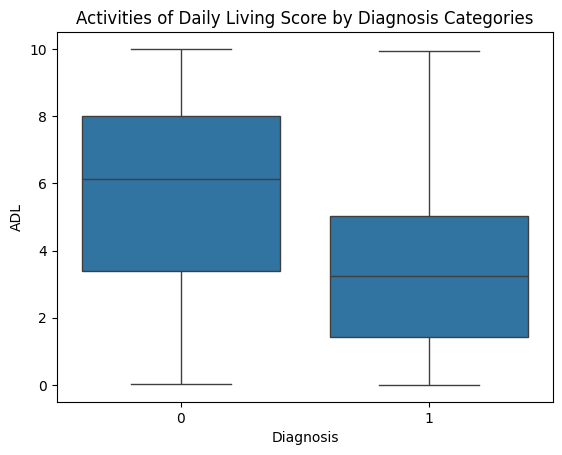

In [ ]:
sns.boxplot(data=df, y='ADL', x='Diagnosis')
plt.title('Activities of Daily Living Score by Diagnosis Categories')
plt.show()


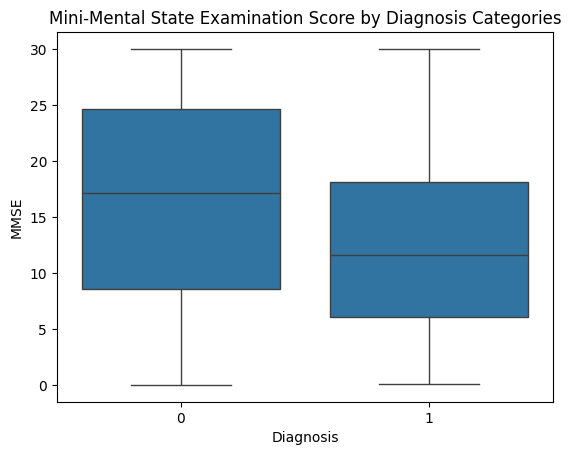

In [ ]:
sns.boxplot(data=df, y='MMSE', x='Diagnosis')
plt.title('Mini-Mental State Examination Score by Diagnosis Categories')
plt.show()


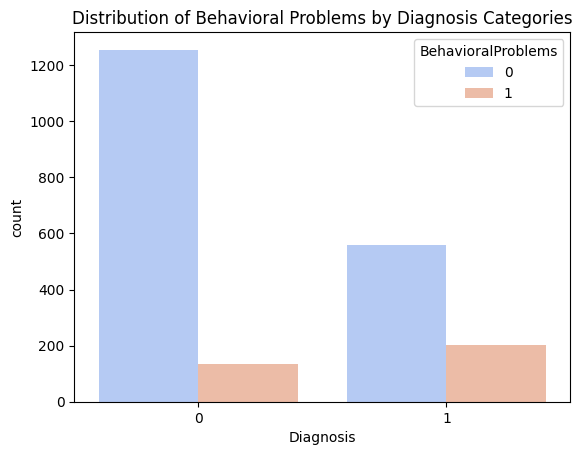

In [ ]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems', palette='coolwarm')
plt.title('Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()




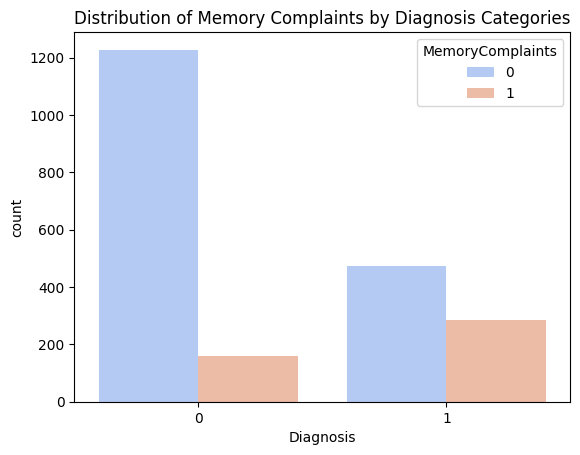

In [ ]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints', palette='coolwarm')
plt.title('Distribution of Memory Complaints by Diagnosis Categories')
plt.show()


As observed, there are five columns correlated with the target variable. Three numerical features—Functional Assessment, ADL (Activities of Daily Living), and MMSE (Mini-Mental State Examination)—are negatively correlated with the diagnosis of Alzheimer's disease, with correlation coefficients of -0.36, -0.33, and -0.24 respectively. This indicates that lower scores in these assessments are associated with a higher likelihood of an Alzheimer's diagnosis. Additionally, two categorical variables—Behavioral Problems and Memory Complaints—are positively correlated with the diagnosis, with correlation coefficients of 0.22 and 0.30 respectively. This means the presence of these issues is associated with a higher likelihood of an Alzheimer's diagnosis, highlighting their significance in the diagnostic process.

In [ ]:
import plotly.express as px

In [ ]:
# How does the average MMSE score vary across different age groups?


# Create age groups using pd.cut
age_groups = pd.cut(df['Age'], bins=[60, 70, 80, 90], labels=['60-69', '70-79', '80-89'])

# Calculate the average MMSE score for each age group
avg_mmse_by_age = df.groupby(age_groups)['MMSE'].mean().reset_index()

# Rename columns for better readability
avg_mmse_by_age.columns = ['Age Group', 'Average MMSE Score']
# Create a bar chart with a custom color pattern using Plotly
fig = px.bar(
    avg_mmse_by_age,
    x='Age Group',
    y='Average MMSE Score',
    labels={'Age Group': 'Age Group', 'Average MMSE Score': 'Average MMSE Score'},
    template="plotly_dark",
    color_discrete_sequence=px.colors.qualitative.Pastel  # Use a predefined Plotly color sequence
)

# Update layout for title and axis labels
fig.update_layout(
    title="Average MMSE Score by Age Group",
    xaxis_title="Age Group",
    yaxis_title="Average MMSE Score"
)

# Show the plot
fig.show()


<ipython-input-20-7b24a493d515>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mmse_by_age = df.groupby(age_groups)['MMSE'].mean().reset_index()


The average MMSE score remains relatively consistent across different age groups, with slight variations.

In [ ]:
import plotly.express as px

# Filter data for patients diagnosed with Alzheimer's (Diagnosis == 1)
alzheimers_data = df[df['Diagnosis'] == 1]

# Create the histogram for PhysicalActivity with a custom color pattern
fig = px.histogram(
    alzheimers_data,
    x='PhysicalActivity',
    labels={'PhysicalActivity': 'Physical Activity (hours/week)'},
    template="plotly_dark",
    color_discrete_sequence=['#FF5733']  # Replace with your preferred color
)

# Update layout for title and axis styling
fig.update_layout(
    title="Distribution of Physical Activity Levels Among Patients with Alzheimer's",
    xaxis_title="Physical Activity (hours/week)",
    yaxis_title="Count of Patients",
    bargap=0.1  # Adjust bar spacing for clarity
)

# Show the plot
fig.show()


Physical activity levels among Alzheimer's patients are widely spread, with no significant concentration in a particular range.

In [ ]:
import plotly.express as px

# Create a histogram to compare SystolicBP distribution for Hypertension groups
fig = px.histogram(
    df,
    x='SystolicBP',
    color='Hypertension',
    barmode='overlay',  # Overlay histograms for comparison
    labels={
        'SystolicBP': 'Systolic Blood Pressure (mmHg)',
        'Hypertension': 'Hypertension (0=No, 1=Yes)'
    },
    template="plotly_dark",
    color_discrete_map={
        0: '#1f77b4',  # Blue for No Hypertension
        1: '#ff7f0e'   # Orange for Yes Hypertension
    }
)

# Update the layout for better aesthetics
fig.update_layout(
    title="Distribution of Systolic Blood Pressure for Patients with and without Hypertension",
    xaxis_title="Systolic Blood Pressure (mmHg)",
    yaxis_title="Count of Patients",
    legend_title="Hypertension",
    bargap=0.1  # Adjust bar spacing
)

# Show the plot
fig.show()


Patients with hypertension generally have higher systolic blood pressure compared to those without hypertension.

In [ ]:
fig = px.bar(
    memory_complaints_counts,
    x='Diagnosis',
    y='Counts',
    color='MemoryComplaints',
    barmode='group',
    labels={
        'Diagnosis': 'Diagnosis (0=No, 1=Yes)',
        'MemoryComplaints': 'Memory Complaints (0=No, 1=Yes)',
        'Counts': 'Number of Patients'
    },
    template="plotly_dark",
    color_discrete_map={
        0: '#2ca02c',  # Green for No Memory Complaints
        1: '#d62728'   # Red for Yes Memory Complaints
    }
)

fig.update_layout(
    title="Number of Patients with Memory Complaints by Alzheimer's Diagnosis Status",
    xaxis_title="Alzheimer's Diagnosis (0=No, 1=Yes)",
    yaxis_title="Number of Patients",
    legend_title="Memory Complaints",
    bargap=0.15
)

fig.show()




 A significant number of patients with Alzheimer's have memory complaints, while fewer patients without Alzheimer's report memory complaints.

In [ ]:
import pandas as pd
import plotly.express as px

# Calculate average cholesterol levels by Diagnosis
avg_cholesterol = df.groupby('Diagnosis')[['CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL']].mean().reset_index()

# Melt the DataFrame for easier visualization with Plotly
avg_cholesterol_melted = avg_cholesterol.melt(
    id_vars='Diagnosis',
    value_vars=['CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL'],
    var_name='Cholesterol Type',
    value_name='Average Level'
)

# Create a grouped bar chart using Plotly with custom colors
fig = px.bar(
    avg_cholesterol_melted,
    x='Diagnosis',
    y='Average Level',
    color='Cholesterol Type',
    barmode='group',
    labels={
        'Diagnosis': "Alzheimer's Diagnosis (0=No, 1=Yes)",
        'Average Level': 'Average Cholesterol Level (mg/dL)',
        'Cholesterol Type': 'Cholesterol Type'
    },
    template="plotly_dark",
    color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom color palette
)

# Update layout for better visualization
fig.update_layout(
    title="Average Cholesterol Levels (Total, LDL, HDL) by Alzheimer's Diagnosis Status",
    xaxis_title="Alzheimer's Diagnosis (0=No, 1=Yes)",
    yaxis_title="Average Cholesterol Level (mg/dL)",
    legend_title="Cholesterol Type",
    bargap=0.15  # Adjust gap between grouped bars
)

# Show the plot
fig.show()


Patients with Alzheimer's tend to have slightly higher average total cholesterol and LDL levels compared to those without Alzheimer's, while the HDL levels are relatively consistent across both groups

In [ ]:
import plotly.express as px

# Group the data by Alzheimer's diagnosis status and smoking status
smoking_counts = df.groupby(['Diagnosis', 'Smoking']).size().reset_index(name='counts')

# Create a grouped bar chart to visualize the number of patients who smoke by Alzheimer's diagnosis status
fig = px.bar(
    smoking_counts,
    x='Diagnosis',
    y='counts',
    color='Smoking',
    barmode='group',
    color_discrete_sequence=['#FFA500', '#1E90FF'],  # Orange and Blue color pattern
    labels={'Diagnosis': 'Diagnosis (0=No, 1=Yes)', 'Smoking': 'Smoking (0=No, 1=Yes)', 'counts': 'Number of Patients'},
    template="plotly_dark"
)

# Update layout for clarity and visual appeal
fig.update_layout(
    title="Number of Patients Who Smoke by Alzheimer's Diagnosis Status",
    xaxis_title="Diagnosis (0=No, 1=Yes)",
    yaxis_title="Number of Patients",
    bargap=0.15,  # Adjust gap between bars for better clarity
    plot_bgcolor="black",  # Black background for the plot area
    paper_bgcolor="black"  # Black background for the overall layout
)

# Show the plot
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Group data by Diagnosis and BehavioralProblems, and count occurrences
behavioral_problems_counts = df.groupby(['Diagnosis', 'BehavioralProblems']).size().reset_index(name='Counts')

# Create a grouped bar chart using Plotly
fig = px.bar(
    behavioral_problems_counts,
    x='Diagnosis',
    y='Counts',
    color='BehavioralProblems',
    barmode='group',  # Group bars side by side
    labels={
        'Diagnosis': "Alzheimer's Diagnosis (0=No, 1=Yes)",
        'BehavioralProblems': 'Behavioral Problems (0=No, 1=Yes)',
        'Counts': 'Number of Patients'
    },
    template="plotly_dark"
)

# Update layout for better visualization
fig.update_layout(
    title="Number of Patients with Behavioral Problems by Alzheimer's Diagnosis Status",
    xaxis_title="Alzheimer's Diagnosis (0=No, 1=Yes)",
    yaxis_title="Number of Patients",
    legend_title="Behavioral Problems",
    bargap=0.15  # Adjust gap between grouped bars
)

# Show the plot
fig.show()

A higher proportion of patients diagnosed with Alzheimer's exhibit behavioral problems compared to those without the diagnosis

In [ ]:
import plotly.express as px

# Create a facet histogram to show the distribution of forgetfulness symptoms by Alzheimer's diagnosis
fig = px.histogram(
    df,
    x='Forgetfulness',
    facet_col='Diagnosis',  # Create a facet for each diagnosis status
    color='Diagnosis',
    labels={
        'Forgetfulness': 'Forgetfulness (0=No, 1=Yes)',
        'Diagnosis': 'Diagnosis (0=No, 1=Yes)'
    },
    template="plotly_dark"
)

# Update layout for better clarity and visual appeal
fig.update_layout(
    title="Distribution of Forgetfulness Symptoms Among Patients with and without Alzheimer's (Faceted)",
    xaxis_title="Forgetfulness (0=No, 1=Yes)",
    yaxis_title="Count of Patients",
    bargap=0.15  # Adjust gap between bars for clarity
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Group data by Diagnosis and PersonalityChanges, counting the number of patients
personality_changes_counts = df.groupby(['Diagnosis', 'PersonalityChanges']).size().reset_index(name='counts')

# Create a facet bar chart for Personality Changes by Alzheimer's Diagnosis status
fig = px.bar(
    personality_changes_counts,
    x='PersonalityChanges',
    y='counts',
    facet_col='Diagnosis',  # Create a facet for each diagnosis status
    color='PersonalityChanges',
    labels={
        'Diagnosis': "Alzheimer's Diagnosis (0=No, 1=Yes)",
        'PersonalityChanges': 'Personality Changes (0=No, 1=Yes)',
        'counts': 'Number of Patients'
    },
    template="plotly_dark",
    color_discrete_sequence=px.colors.qualitative.Pastel  # Softer color palette
)

# Update layout for better clarity and visual appeal
fig.update_layout(
    title="Personality Changes by Alzheimer's Diagnosis Status",
    xaxis_title="Personality Changes (0=No, 1=Yes)",
    yaxis_title="Number of Patients",
    legend_title="Personality Changes"
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Create a box plot to show the distribution of ADL scores
fig = px.box(
    df,
    x='Diagnosis',
    y='ADL',
    labels={
        'Diagnosis': "Alzheimer's Diagnosis (0=No, 1=Yes)",
        'ADL': 'Activities of Daily Living (ADL) Score'
    },
    template="plotly_dark"
)

# Update layout for better presentation
fig.update_layout(
    title="Distribution of Activities of Daily Living (ADL) Scores Among Patients with and without Alzheimer's",
    xaxis_title="Alzheimer's Diagnosis (0=No, 1=Yes)",
    yaxis_title="ADL Score",
    boxmode='group'  # Grouping is relevant for categorical x-axis
)

# Show the plot
fig.show()

Patients with Alzheimer's have lower Activities of Daily Living (ADL) scores, indicating greater impairment in daily activities compared to those without Alzheimer's

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of diseases to visualize
diseases = ['Diabetes', 'Hypertension', 'CardiovascularDisease']

# Create subplots with 1 row and 3 columns for the three diseases
fig = make_subplots(rows=1, cols=3, subplot_titles=diseases)

# Add bar traces for each disease
for i, disease in enumerate(diseases, 1):
    disease_counts = df[disease].value_counts()
    fig.add_trace(
        go.Bar(
            x=disease_counts.index,
            y=disease_counts.values,
            name=disease,
            marker=dict(color=['#00bfae', '#f8710b'])  # Custom colors for 0 (No) and 1 (Yes)
        ),
        row=1, col=i
    )

# Update layout for a clean presentation
fig.update_layout(
    title="Number of Patients with Diabetes, Hypertension, and Cardiovascular Disease",
    template="plotly_dark",
    showlegend=False,  # Optional: Hide legend for clarity since each subplot has a title
    height=500  # Optional: Adjust height for better spacing
)

# Show the plot
fig.show()

The majority of patients have hypertension, followed by cardiovascular disease and diabetes. The prevalence of these conditions is high among the patient population

In [ ]:
import plotly.express as px

# Create a histogram to show the distribution of forgetfulness symptoms by Alzheimer's diagnosis
fig = px.histogram(
    df,
    x='Forgetfulness',
    color='Diagnosis',
    barmode='overlay',
    labels={
        'Forgetfulness': 'Forgetfulness (0=No, 1=Yes)',
        'Diagnosis': 'Diagnosis (0=No, 1=Yes)'
    },
    template="plotly_dark"
)

# Update layout for better clarity and visual appeal
fig.update_layout(
    title="Distribution of Forgetfulness Symptoms Among Patients with and without Alzheimer's",
    xaxis_title="Forgetfulness (0=No, 1=Yes)",
    yaxis_title="Count of Patients",
    bargap=0.15,  # Adjust gap between bars for clarity
    barmode='overlay'  # Overlay bars for comparison
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# Group by Education Level and calculate the average MMSE score
avg_mmse_by_education = df.groupby('EducationLevel')['MMSE'].mean().reset_index()

# Create a bar chart for the average MMSE score by education level
fig = px.bar(
    avg_mmse_by_education,
    x='EducationLevel',
    y='MMSE',
    labels={'EducationLevel': 'Education Level', 'MMSE': 'Average MMSE Score'},
    template="plotly_dark"
)

# Update the layout for better readability
fig.update_layout(
    title="Average MMSE Score by Education Level",
    xaxis_title="Education Level",
    yaxis_title="Average MMSE Score",
    xaxis=dict(tickmode='array', tickvals=[0, 1, 2, 3], ticktext=["None", "High School", "Bachelor's", "Higher"]),
    bargap=0.15  # Adjust the gap between bars for better clarity
)

# Show the plot
fig.show()

The average MMSE score is similar across different education levels.

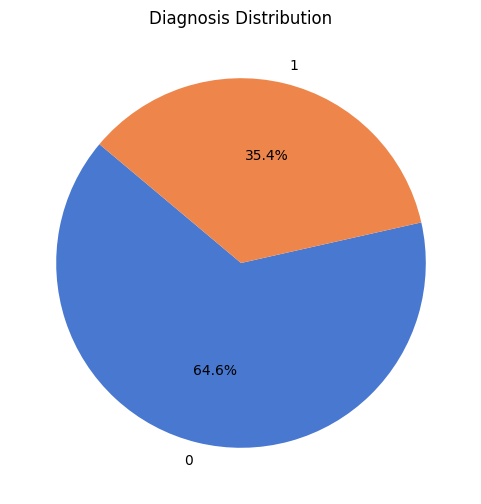

In [ ]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



Original class distribution:
 Diagnosis
0    1111
1     608
Name: count, dtype: int64

Balanced class distribution after SMOTE:
 Diagnosis
0    1111
1    1111
Name: count, dtype: int64


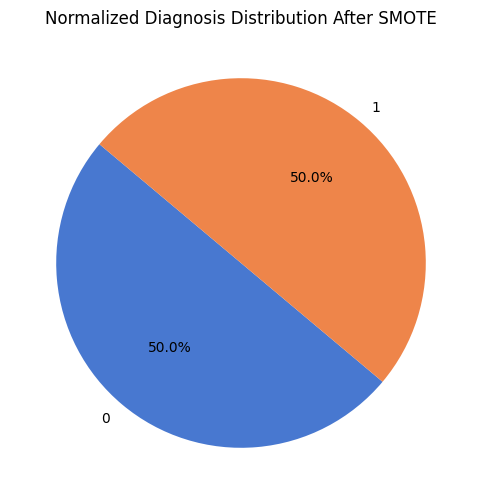

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

# Split features and target variable
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original class distribution:\n", y_train.value_counts())
print("\nBalanced class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())

# (Optional) Plot the new distribution
categories = [0, 1]
counts = pd.Series(y_train_smote).value_counts().tolist()

import matplotlib.pyplot as plt
import seaborn as sns

# Use a muted color palette
colors = sns.color_palette("muted")

# Plot the normalized pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Normalized Diagnosis Distribution After SMOTE')
plt.show()


In [ ]:
# Combine the features and target into a single DataFrame
corrected_dataset = pd.concat([pd.DataFrame(X_train_smote, columns=X.columns),
                               pd.Series(y_train_smote, name='Diagnosis')], axis=1)

# Save the corrected dataset to a CSV file (optional)
corrected_dataset.to_csv("corrected_training_dataset.csv", index=False)

# Display the first few rows of the corrected dataset
print(corrected_dataset.head())


   Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   86       0          2               1  28.155961        0   
1   62       1          0               3  28.189210        1   
2   75       0          0               0  25.391526        0   
3   89       0          0               0  23.581751        0   
4   76       1          0               2  38.768590        1   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           18.629164          6.535593     1.316452      9.620590  ...   
1            7.763349          1.913491     6.023577      5.039160  ...   
2            8.449637          9.549369     1.774418      7.951681  ...   
3            1.939227          1.322465     8.758693      9.262999  ...   
4            9.013919          8.296794     7.892595      5.928934  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              5.566873                 0                   0  0.232938   
1       

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the original dataset
data = pd.read_csv('alzehaimers.csv')

# Separate features and target
X = data.drop(columns=['Diagnosis', 'DoctorInCharge', 'PatientID'])  # 'Diagnosis' is assumed to be the target
y = data['Diagnosis']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing for numerical data using Min-Max Scaler
numerical_transformer = MinMaxScaler()
X[numerical_cols] = numerical_transformer.fit_transform(X[numerical_cols])

# Preprocessing for categorical data using OneHotEncoder
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categories = pd.DataFrame(
    categorical_transformer.fit_transform(X[categorical_cols]),
    columns=categorical_transformer.get_feature_names_out(categorical_cols),
    index=X.index
)

# Drop original categorical columns and concatenate the encoded categories
X = X.drop(columns=categorical_cols).join(encoded_categories)

# Combine the preprocessed features with the target for saving
preprocessed_data = pd.concat([X, y], axis=1)

# Save the preprocessed dataset to a CSV file
preprocessed_data.to_csv('preprocessed_corrected_dataset.csv', index=False)

# Display a preview of the preprocessed dataset
print(preprocessed_data.head())




        Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0  0.433333     0.0        0.0        0.666667  0.316960      0.0   
1  0.966667     0.0        0.0        0.000000  0.473058      0.0   
2  0.433333     0.0        1.0        0.333333  0.111553      0.0   
3  0.466667     1.0        0.0        0.333333  0.752163      1.0   
4  0.966667     0.0        0.0        0.000000  0.228472      0.0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0            0.665183          0.633375     0.133931      0.837564  ...   
1            0.227170          0.762862     0.050995      0.525021  ...   
2            0.978276          0.785408     0.181896      0.945597  ...   
3            0.610751          0.843804     0.743443      0.731994  ...   
4            0.923204          0.631707     0.078698      0.265892  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              0.652102               0.0                 0

Saving preprocessed_corrected_dataset.csv to preprocessed_corrected_dataset (1).csv


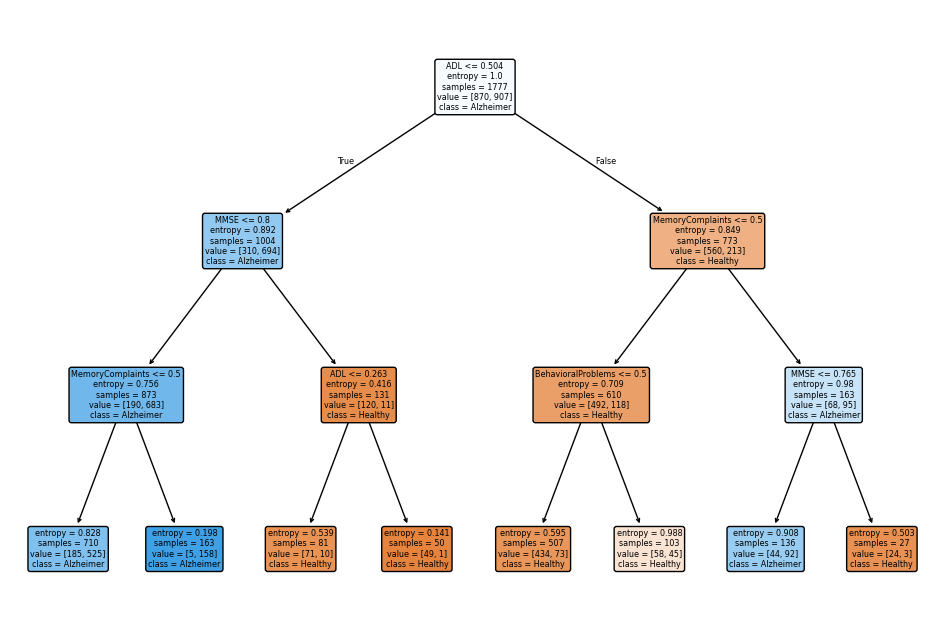

In [3]:
# Install required libraries (if not already installed)
!pip install matplotlib scikit-learn pandas

# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'preprocessed_corrected_dataset.csv' with your file path in Colab
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Automatically get the uploaded file name
data = pd.read_csv(filename)

# Select the top features and target variable
top_features = ['ADL', 'MMSE', 'BehavioralProblems', 'MemoryComplaints']
target = 'Diagnosis'

# Prepare the data
X = data[top_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=top_features, class_names=['Healthy', 'Alzheimer'], filled=True, rounded=True)
plt.show()

# Evaluate feature importance (optional)
feature_importances = clf.feature_importances_
for feature, importance in zip(top_features, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.3f}")
